**Author:** Sydney Crandall

**Last Edited:** June 1st, 2022

In [1]:
# imports
import pandas as pd
import numpy as np
import cluster
import math
import munge
import datetime as dt
from metpy.units import units
import visualizations as vis
import matplotlib.pyplot as plt
import seaborn as sb
import gapstat as gs

In [2]:
# run functions from munge.py
bou = munge.from_raw("boulderRaw.csv")
bou = munge.add_season_rearrange(bou)
bou = munge.replace_month_hour(bou)
bou = munge.wet_bulb(bou)
bouHourly = munge.to_hourly(bou)
bouDaily = munge.to_daily(bouHourly)

bouHourly.to_csv("bouHourly.csv")
bouDaily.to_csv("bouDaily.csv")

In [3]:
# run the functions from cluster.py
included_cols = ['drytemp_max', 'drytemp_min', 'dewtemp_avg','RH_max',
                 'RH_min','wspd_max', 'wdir_avg', 'prec_inch','drytemp_max_hour', 'drytemp_min_hour', 'pres_tend']
bouData, bouScaledData = cluster.scale_and_convert_to_numpy(bouDaily, included_cols)

#init_centroids = cluster.plus_plus(albScaledData, 4)
k = 4
bouScaledCentroids, bouIdx = cluster.cluster_data(k, bouScaledData)

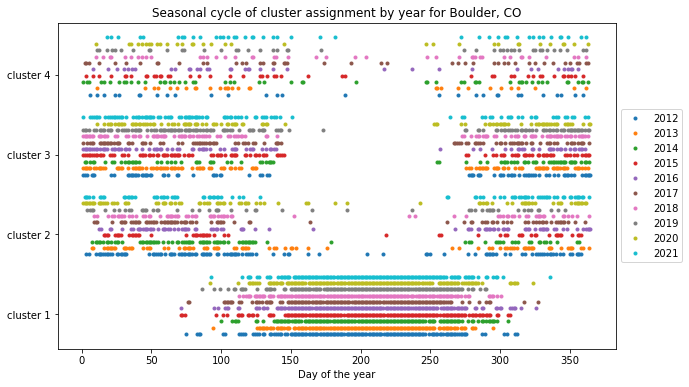

In [4]:
cluster_label_list = ["cluster 1", "cluster 2", "cluster 3", "cluster 4"]
vis.seasonal_assignment_by_year("Boulder, CO", cluster_label_list[0:4], 4, bouDaily, bouIdx)

In [13]:
bouDailyCentroids = cluster.get_centroids(bouScaledCentroids, included_cols, bouDaily)
bouDailyCentroids

,drytemp_max,drytemp_min,dewtemp_avg,RH_max,RH_min,wspd_max,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,pres_tend
cluster,,,,,,,,,,,
1,81.735788,55.732134,42.038947,70.339973,22.613864,10.447898,115.587723,0.009693,13.243683,4.991198,-1.321999
2,61.586521,36.947064,18.744377,59.417504,17.359426,19.862272,173.499948,0.001518,12.756154,7.894028,-0.226732
3,47.158566,26.998000,22.777010,85.590926,39.473536,8.024729,93.010745,0.008701,13.655518,3.927567,-2.142126
4,45.786759,30.630973,27.879422,91.933394,50.025131,11.926012,113.744922,0.085778,4.049335,18.200052,4.529896


In [6]:
bouDaily['cluster'] = bouIdx

In [7]:
bouDailyGroups = bouDaily.groupby('cluster')

In [8]:
bouDailyGroups.get_group(1).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.0
mean,3.084175,81.708084,55.664982,41.902355,53.024242,70.178116,22.499327,840.728943,836.689880,10.463973,0.033333,115.841751,0.009418,13.248485,4.985859,1.956229,7.296296,11.543434,-1.325253,1.0
std,0.636109,8.820182,7.550279,8.149519,5.671201,17.601782,10.697808,3.398125,3.694937,4.039629,0.308899,32.668076,0.043196,1.914146,5.314420,5.409022,7.395436,6.496134,4.376173,0.0
min,1.000000,55.000000,36.000000,13.000000,33.000000,20.500000,4.000000,828.000000,818.000000,3.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000,1.0
25%,3.000000,75.000000,50.000000,36.000000,49.000000,56.000000,15.000000,839.000000,835.000000,7.000000,0.000000,94.000000,0.000000,12.000000,3.000000,0.000000,0.000000,12.000000,-4.000000,1.0
50%,3.000000,82.000000,57.000000,43.000000,54.000000,69.500000,20.000000,841.000000,837.000000,9.000000,0.000000,116.000000,0.000000,13.000000,4.000000,0.000000,5.000000,14.000000,-2.000000,1.0
75%,3.000000,88.000000,61.000000,48.000000,57.000000,83.000000,28.000000,843.000000,839.000000,13.000000,0.000000,138.000000,0.000000,14.000000,5.000000,0.000000,8.000000,15.000000,2.000000,1.0
max,4.000000,102.000000,73.000000,61.000000,65.000000,100.000000,78.000000,852.000000,849.000000,28.000000,4.000000,228.000000,0.700000,21.000000,23.000000,23.000000,23.000000,23.000000,14.000000,1.0


In [9]:
bouDailyGroups.get_group(2).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,782.00000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.0
mean,2.13555,61.445011,36.869564,18.682865,35.195652,59.556904,17.370205,837.873413,832.677734,20.097826,0.432225,174.442459,0.001637,12.648338,8.139386,0.547315,8.450128,10.787724,-0.033248,2.0
std,1.19304,11.747190,10.175547,8.401522,7.284161,19.314640,6.521372,4.150029,5.049396,7.637073,1.207321,36.763504,0.011122,2.641221,8.514340,3.196859,8.589780,6.588583,6.276300,0.0
min,1.00000,30.000000,5.000000,-6.000000,14.000000,16.000000,2.000000,821.000000,811.000000,5.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.000000,2.0
25%,1.00000,54.000000,30.000000,13.000000,30.000000,46.000000,12.000000,836.000000,830.000000,15.000000,0.000000,148.000000,0.000000,12.000000,2.000000,0.000000,0.000000,4.000000,-4.000000,2.0
50%,2.00000,61.000000,36.000000,19.000000,35.000000,59.000000,17.000000,837.000000,834.000000,20.000000,0.000000,173.000000,0.000000,13.000000,5.000000,0.000000,7.000000,13.000000,-2.000000,2.0
75%,4.00000,70.000000,43.000000,25.000000,40.000000,70.000000,22.000000,840.000000,835.000000,24.000000,0.000000,200.000000,0.000000,14.000000,19.000000,0.000000,18.000000,14.000000,5.000000,2.0
max,4.00000,99.000000,73.000000,43.000000,58.000000,100.000000,43.000000,850.000000,845.000000,55.000000,7.000000,310.000000,0.130000,23.000000,23.000000,23.000000,23.000000,23.000000,19.000000,2.0


In [10]:
bouDailyGroups.get_group(3).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.0
mean,2.028455,47.300812,27.109247,22.791666,30.491869,85.342476,39.279980,839.746460,834.781982,8.061992,0.027439,93.218498,0.008603,13.652439,3.940041,1.411585,6.444106,12.424797,-2.160569,3.0
std,1.188793,11.958310,10.197954,9.921593,8.886534,14.560526,18.032875,4.731822,4.888743,3.452373,0.291903,38.801643,0.032712,2.193845,4.164406,4.509096,7.553736,7.199980,5.449167,0.0
min,1.000000,3.000000,-9.000000,-10.000000,-4.000000,40.000000,7.000000,821.000000,817.000000,3.000000,0.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-21.000000,3.0
25%,1.000000,39.000000,21.000000,16.000000,25.000000,75.000000,26.000000,836.000000,833.000000,6.000000,0.000000,65.000000,0.000000,13.000000,1.000000,0.000000,0.000000,12.000000,-6.000000,3.0
50%,2.000000,48.000000,28.000000,23.000000,31.000000,92.000000,35.000000,839.000000,835.000000,7.000000,0.000000,93.000000,0.000000,14.000000,3.000000,0.000000,5.000000,13.000000,-2.000000,3.0
75%,2.000000,55.625000,34.000000,30.000000,36.250000,100.000000,50.000000,843.000000,837.000000,9.000000,0.000000,118.000000,0.000000,15.000000,5.000000,0.000000,8.000000,16.000000,2.000000,3.0
max,4.000000,72.000000,52.000000,52.000000,52.000000,100.000000,93.000000,859.000000,848.000000,30.000000,4.000000,260.000000,0.370000,23.000000,23.000000,23.000000,23.000000,23.000000,14.000000,3.0


In [14]:
bouDailyGroups.get_group(4).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.0
mean,2.231343,45.365673,30.432837,27.980099,33.216419,92.461441,50.792290,839.258728,832.725098,11.679105,0.213930,112.621887,0.088085,4.024876,18.082090,6.203980,13.216418,6.226368,4.383085,4.0
std,1.202123,13.781091,12.958567,12.206233,11.424281,11.577407,22.691818,4.787009,5.550573,4.908414,0.785786,52.408531,0.201728,5.202088,6.751427,7.784708,8.249261,6.971692,6.411687,0.0
min,1.000000,5.000000,-6.000000,-5.000000,0.000000,44.000000,12.000000,824.000000,809.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,4.0
25%,1.000000,36.000000,23.000000,19.000000,26.000000,90.000000,31.250000,836.000000,830.000000,8.000000,0.000000,73.500000,0.000000,0.000000,17.000000,0.000000,7.000000,0.000000,-2.000000,4.0
50%,2.000000,46.000000,30.000000,27.000000,33.000000,100.000000,49.000000,839.000000,834.000000,11.000000,0.000000,107.500000,0.010000,0.000000,21.000000,0.000000,17.000000,2.000000,5.000000,4.0
75%,4.000000,55.000000,37.000000,34.000000,39.000000,100.000000,68.000000,843.000000,836.000000,15.000000,0.000000,143.750000,0.090000,10.000000,23.000000,14.000000,21.000000,13.000000,9.000000,4.0
max,4.000000,79.000000,63.000000,61.000000,63.000000,100.000000,100.000000,853.000000,847.000000,30.000000,4.500000,311.000000,2.380000,15.000000,23.000000,23.000000,23.000000,23.000000,20.000000,4.0
